In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv("D:\\zexcelR\\DS Assignments\\Assignment7\\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
#normalizing the data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df_norm = norm_func(crime.iloc[:,1:])

In [5]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


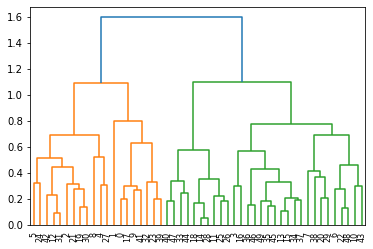

In [6]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [7]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']


In [8]:
#Selecting optimal number of clusters n=4
clust=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [9]:
clust

AgglomerativeClustering(n_clusters=4)

In [10]:
y_clust=clust.fit_predict(df_norm)
clusters=pd.DataFrame(y_clust,columns=['clusters'])
clusters

,clusters
0,3
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [11]:
crime.value_counts()

Unnamed: 0      Murder  Assault  UrbanPop  Rape
Alabama         13.2    236      58        21.2    1
Pennsylvania    6.3     106      72        14.9    1
Nevada          12.2    252      81        46.0    1
New Hampshire   2.1     57       56        9.5     1
New Jersey      7.4     159      89        18.8    1
New Mexico      11.4    285      70        32.1    1
New York        11.1    254      86        26.1    1
North Carolina  13.0    337      45        16.1    1
North Dakota    0.8     45       44        7.3     1
Ohio            7.3     120      75        21.4    1
Oklahoma        6.6     151      68        20.0    1
Oregon          4.9     159      67        29.3    1
Rhode Island    3.4     174      87        8.3     1
Alaska          10.0    263      48        44.5    1
South Carolina  14.4    279      48        22.5    1
South Dakota    3.8     86       45        12.8    1
Tennessee       13.2    188      59        26.9    1
Texas           12.7    201      80        25.5    

In [12]:
#Add clusters to dataset
crime['clustid']=clust.labels_

In [13]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [19]:
#calculate silhouette coefficient or silhouette score to check cluster optimacy
silhouetteK=metrics.silhouette_score(df_norm,clust.labels_,metric='euclidean')
silhouetteK

0.3298707379986785

In [14]:
crime.groupby('clustid').agg(['mean']).reset_index()

,clustid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


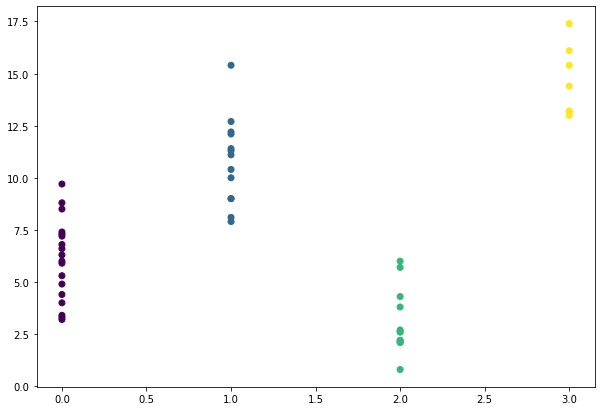

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(crime['clustid'],crime['Murder'],c=clust.labels_)